This is a project on SJR Journal Ranking data scraping, transformation, analysis, and visializationn.

This notebook loads the scraped data from CSV files, transforms and combines the data from different sources into one DataFrame object and then performs Exploratory Data Analysis (EDA).

Project Repo: [SJR-Journal-Ranking](https://github.com/abir0/SJR-Journal-Ranking)

#### Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Transformation

### Download Data Files

In [ ]:
!gdown --id 1wxZYJh72U0SjMYhD2cnNBzcAmj3iifhr
!gdown --id 1hs9H-jcwwnUlxPKwM4X13mc02wVy0iNN
!gdown --id 1RJqeJiI5ks2WtEwuR9rKf10TS5ccbJvT

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1wxZYJh72U0SjMYhD2cnNBzcAmj3iifhr
To: /content/sjr_journal_ranking_2022.csv
100% 6.98M/6.98M [00:00<00:00, 218MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hs9H-jcwwnUlxPKwM4X13mc02wVy0iNN
To: /content/wos_master_journal_list.csv
100% 3.75M/3.75M [00:00<00:00, 199MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
Fr

### SJR Data Load & Transform

#### Load the data

In [ ]:
sjr_df = pd.read_csv("/content/sjr_journal_ranking_2022.csv")
sjr_df

,Rank,Title,Open Access,URL,SJR index,Best Quartile,Best Categories,H index,Total Docs.,Total Docs. 3y,Total Refs.,Total Cites 3y,Citable Docs. 3y,Cites/Doc. 2y,Refs./Doc.,Country,Subject Area
0,1,Genome Biology,True,https://www.scimagojr.com/journalsearch.php?q=...,9.249,Q1,"['Ecology, Evolution, Behavior and Systematics']",284,264,921,17776,13885,888,11.07,67.33,United Kingdom,Agricultural and Biological Sciences
1,2,Annual Review of Pathology: Mechanisms of Disease,False,https://www.scimagojr.com/journalsearch.php?q=...,8.628,Q1,['Plant Science'],143,0,83,0,2315,83,26.19,0.00,United States,Agricultural and Biological Sciences
2,3,Annual Review of Plant Biology,True,https://www.scimagojr.com/journalsearch.php?q=...,8.131,Q1,['Plant Science'],286,27,111,4341,2740,106,19.26,160.78,United States,Agricultural and Biological Sciences
3,4,Nature Sustainability,True,https://www.scimagojr.com/journalsearch.php?q=...,6.568,Q1,['Food Science'],89,183,561,7144,10678,384,19.80,39.04,United Kingdom,Agricultural and Biological Sciences
4,5,Molecular Systems Biology,True,https://www.scimagojr.com/journalsearch.php?q=...,6.220,Q1,['Agricultural and Biological Sciences (miscel...,164,65,224,4390,2203,204,8.76,67.54,United States,Agricultural and Biological Sciences
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30624,183,Kleintierpraxis,False,https://www.scimagojr.com/journalsearch.php?q=...,0.124,Q4,['Small Animals'],14,49,147,1209,15,135,0.09,24.67,Germany,Veterinary
30625,184,Magyar Allatorvosok Lapja,False,https://www.scimagojr.com/journalsearch.php?q=...,0.119,Q4,['Veterinary (miscellaneous)'],11,57,200,2053,21,173,0.10,36.02,Hungary,Veterinary
30626,185,Zuchtungskunde,False,https://www.scimagojr.com/journalsearch.php?q=...,0.119,Q4,['Food Animals'],16,0,55,0,5,52,0.18,0.00,Germany,Veterinary
30627,186,International Journal of Applied Research in V...,False,https://www.scimagojr.com/journalsearch.php?q=...,0.117,Q4,['Veterinary (miscellaneous)'],15,0,45,0,11,45,0.07,0.00,United States,Veterinary


In [ ]:
sjr_df.columns

Index(['Rank', 'Title', 'Open Access', 'URL', 'SJR index', 'Best Quartile',
       'Best Categories', 'H index', 'Total Docs.', 'Total Docs. 3y',
       'Total Refs.', 'Total Cites 3y', 'Citable Docs. 3y', 'Cites/Doc. 2y',
       'Refs./Doc.', 'Country', 'Subject Area'],
      dtype='object')

#### Clean the data

Remove duplicates and null values

In [ ]:
sjr_df.duplicated().sum()

0

In [ ]:
sjr_df.isnull().sum()

Rank                 0
Title                0
Open Access          0
URL                  0
SJR index           30
Best Quartile       30
Best Categories     30
H index              0
Total Docs.          0
Total Docs. 3y       0
Total Refs.          0
Total Cites 3y       0
Citable Docs. 3y     0
Cites/Doc. 2y        0
Refs./Doc.           0
Country              0
Subject Area         0
dtype: int64

In [ ]:
sjr_df.dropna(inplace=True)

Remove unnessary columns

In [ ]:
sjr_df.drop(['URL', 'Best Categories'], axis=1, inplace=True)

---

#### Transform the data

Rename Columns

In [ ]:
sjr_df.rename(columns={'Rank': 'Subject Rank'}, inplace=True)

Remove **Title** duplicates

As many journals are present in multiple **Subject Areas**, this creates the duplicates.

In [ ]:
sjr_df['Title'].duplicated().sum()

12586

In [ ]:
sjr_df[sjr_df.duplicated(['Title'], keep=False)].head(10)

In [ ]:
unique_sjr_df = sjr_df.drop_duplicates('Title')
unique_sjr_df.reset_index(drop=True, inplace=True)
unique_sjr_df

,Subject Rank,Title,Open Access,SJR index,Best Quartile,H index,Total Docs.,Total Docs. 3y,Total Refs.,Total Cites 3y,Citable Docs. 3y,Cites/Doc. 2y,Refs./Doc.,Country,Subject Area
0,1,Ca-A Cancer Journal for Clinicians,False,86.091,Q1,198,44,118,4268,30318,85,299.99,97.00,United States,Medicine
1,1,Quarterly Journal of Economics,False,36.730,Q1,292,36,122,2398,2141,122,14.83,66.61,United Kingdom,"Economics, Econometrics and Finance"
2,1,Nature Reviews Molecular Cell Biology,False,34.201,Q1,485,121,328,10804,13331,156,35.47,89.29,United Kingdom,"Biochemistry, Genetics and Molecular Biology"
3,2,Cell,False,26.494,Q1,856,420,1637,27609,67791,1440,43.80,65.74,United States,"Biochemistry, Genetics and Molecular Biology"
4,2,New England Journal of Medicine,False,26.015,Q1,1130,1410,4561,14396,133956,1854,33.93,10.21,United States,Medicine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18008,2717,Western Humanities Review,False,0.100,Q4,6,0,63,0,0,57,0.00,0.00,United States,Arts and Humanities
18009,2718,Yale Review,False,0.100,Q4,4,47,209,0,4,103,0.02,0.00,United States,Arts and Humanities
18010,2719,Zeitschrift fur Theologie und Kirche,False,0.100,Q4,6,15,56,415,8,56,0.15,27.67,Germany,Arts and Humanities
18011,2720,Zivot Umjetnosti,True,0.100,Q4,2,0,65,0,4,59,0.08,0.00,Croatia,Arts and Humanities


This histogram compares the **Subject Area** column *before* and *after* the removal of **Title** duplicates. As this is a lossy process, we will loose information on the amount and proportion of each subject area. But the KDE curve shows that the proportion is *mostly* preserved. So, for this project, we can move along with this small compromise.



<Axes: xlabel='Subject Area', ylabel='Count'>

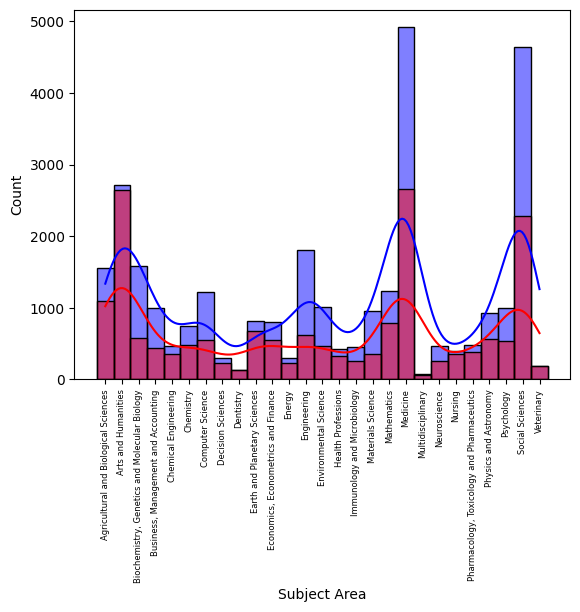

In [ ]:
fig, ax = plt.subplots()
plt.xticks(size=6, rotation=90)
sns.histplot(sjr_df['Subject Area'], color='blue', alpha=0.5, kde=True)
sns.histplot(unique_sjr_df['Subject Area'], color='red', alpha=0.5, kde=True)

Change the data type

Some columns are categorical so the data type is changed to *category* for those columns. This is needed so sort the data based on ordered categorial columns.

In [ ]:
sjr_df['Best Quartile'] = sjr_df['Best Quartile'].astype('category')
sjr_df['Subject Area'] = sjr_df['Subject Area'].astype('category')

In [ ]:
sjr_df['Best Quartile'] = sjr_df['Best Quartile'].cat.set_categories(['Q1', 'Q2', 'Q3', 'Q4'], ordered=True)

Sort the data

In [ ]:
sjr_df.sort_values(['SJR index', 'Best Quartile', 'Subject Rank'], ascending=[False, True, True], inplace=True)

In [ ]:
sjr_df.reset_index(drop=True, inplace=True)

Add an **Overall Rank** based on the sorted index (i.e. **SJR index**)

In [ ]:
sjr_df["Overall Rank"] = sjr_df.index + 1

### WoS Data Load & Transform

#### Load the data

In [ ]:
wos_df = pd.read_csv("/content/wos_master_journal_list.csv")
wos_df

#### Clean the data

In [ ]:
wos_df.isnull().sum()

Title              0
Publisher          0
Address            1
Core Collection    0
dtype: int64

In [ ]:
wos_df[wos_df.isnull().any(axis=1)]

,Title,Publisher,Address,Core Collection
20854,REVISTA BIBLICA,ASOCIACIÓN BÍBLICA ARGENTINA,NaN,Emerging Sources Citation Index


In [ ]:
wos_df.dropna(inplace=True)

In [ ]:
wos_df.duplicated().sum()

0

#### Combine the data

Extract and add the **Publisher** column into the combined data

In [ ]:
unique_sjr_df[unique_sjr_df['Title'] == "2D Materials"]

,Subject Rank,Title,Open Access,SJR index,Best Quartile,H index,Total Docs.,Total Docs. 3y,Total Refs.,Total Cites 3y,Citable Docs. 3y,Cites/Doc. 2y,Refs./Doc.,Country,Subject Area
1688,63,2D Materials,False,1.631,Q1,87,162,643,10836,3514,641,5.44,66.89,United Kingdom,Chemistry


In [ ]:
wos_df[wos_df['Title'] == "2D Materials".upper()]

,Title,Publisher,Address,Core Collection
1,2D MATERIALS,IOP PUBLISHING LTD,"TEMPLE CIRCUS, TEMPLE WAY, BRISTOL, ENGLAND, B...",Science Citation Index Expanded


In [ ]:
publisher = {}
for title in sjr_df['Title']:
  try:
    publisher[title] = wos_df.loc[wos_df['Title'] == title.upper(), 'Publisher'].item().title()
  except ValueError:
    publisher[title] = ""

publisher

In [ ]:
unique_sjr_df['Publisher'] = unique_sjr_df['Title'].map(publisher)

<ipython-input-152-1e66c5dae083>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_sjr_df['Publisher'] = unique_sjr_df['Title'].map(publisher)


### Scopus External Data Load & Transform

In [ ]:
scopus_df = pd.read_excel("/content/scopus_citescore_2022.xlsx", sheet_name=0)

In [ ]:
scopus_df['2022\nCiteScore'].isna().sum()

16114

In [ ]:
scopus_df = scopus_df[scopus_df['2022\nCiteScore'].notna()]

In [ ]:
scopus_df.sort_values(['2022\nCiteScore'], ascending=False, inplace=True)

<ipython-input-159-1817484d16c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scopus_df.sort_values(['2022\nCiteScore'], ascending=False, inplace=True)


In [ ]:
scopus_df.reset_index(drop=True, inplace=True)

In [ ]:
scopus_df['Titles discontinued by Scopus due to quality issues'].notnull().sum()

4

In [ ]:
scopus_df = scopus_df[scopus_df['Titles discontinued by Scopus due to quality issues'].isnull()]

In [ ]:
scopus_df.rename(columns={'2022\nCiteScore': 'CiteScore', 'Source Title (Medline-sourced journals are indicated in Green)': 'Title'}, inplace=True)

In [ ]:
scopus_df = scopus_df[["Title", "CiteScore", "Coverage"]]

In [ ]:
scopus_df['Coverage'] = scopus_df['Coverage'].apply(lambda x: x.split(',')[-1].split('-')[0].strip())

<ipython-input-202-ec9a1d4c628a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scopus_df['Coverage'] = scopus_df['Coverage'].apply(lambda x: x.split(',')[-1].split('-')[0].strip())


In [ ]:
cite_score = {}
scopus_df['Cap Title'] = scopus_df['Title'].apply(lambda x: x.upper())
for title in unique_sjr_df['Title']:
  try:
    cite_score[title] = scopus_df.loc[scopus_df['Cap Title'] == title.upper(), 'CiteScore'].item()
  except ValueError:
    cite_score[title] = 0.0

cite_score

In [ ]:
unique_sjr_df['CiteScore'] = unique_sjr_df['Title'].map(cite_score)

<ipython-input-178-cfb0e4866039>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_sjr_df['CiteScore'] = unique_sjr_df['Title'].map(cite_score)


In [ ]:
unique_sjr_df['Coverage'] = scopus_df['Coverage']

<ipython-input-203-3fd49905952b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_sjr_df['Coverage'] = scopus_df['Coverage']


In [ ]:
unique_sjr_df

,Subject Rank,Title,Open Access,SJR index,Best Quartile,H index,Total Docs.,Total Docs. 3y,Total Refs.,Total Cites 3y,Citable Docs. 3y,Cites/Doc. 2y,Refs./Doc.,Country,Subject Area,Publisher,Overall Rank,CiteScore,Coverage
0,1,Ca-A Cancer Journal for Clinicians,False,86.091,Q1,198,44,118,4268,30318,85,299.99,97.00,United States,Medicine,Wiley,1,642.9,1950
1,1,Quarterly Journal of Economics,False,36.730,Q1,292,36,122,2398,2141,122,14.83,66.61,United Kingdom,"Economics, Econometrics and Finance",Oxford Univ Press Inc,2,25.1,2000
2,1,Nature Reviews Molecular Cell Biology,False,34.201,Q1,485,121,328,10804,13331,156,35.47,89.29,United Kingdom,"Biochemistry, Genetics and Molecular Biology",Nature Portfolio,3,164.4,1945
3,2,Cell,False,26.494,Q1,856,420,1637,27609,67791,1440,43.80,65.74,United States,"Biochemistry, Genetics and Molecular Biology",Cell Press,4,102.0,1823
4,2,New England Journal of Medicine,False,26.015,Q1,1130,1410,4561,14396,133956,1854,33.93,10.21,United States,Medicine,Massachusetts Medical Soc,5,134.4,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18008,2717,Western Humanities Review,False,0.100,Q4,6,0,63,0,0,57,0.00,0.00,United States,Arts and Humanities,Univ Utah Dept English,18009,0.0,2010
18009,2718,Yale Review,False,0.100,Q4,4,47,209,0,4,103,0.02,0.00,United States,Arts and Humanities,Wiley,18010,0.0,2020
18010,2719,Zeitschrift fur Theologie und Kirche,False,0.100,Q4,6,15,56,415,8,56,0.15,27.67,Germany,Arts and Humanities,J C B Mohr,18011,0.2,2008
18011,2720,Zivot Umjetnosti,True,0.100,Q4,2,0,65,0,4,59,0.08,0.00,Croatia,Arts and Humanities,Inst Povijest Umjetnosti-Inst Art History,18012,0.1,2006


### Final Data

In [ ]:
unique_sjr_df.head(6)

,Subject Rank,Title,Open Access,SJR index,Best Quartile,H index,Total Docs.,Total Docs. 3y,Total Refs.,Total Cites 3y,Citable Docs. 3y,Cites/Doc. 2y,Refs./Doc.,Country,Subject Area,Publisher,Overall Rank,CiteScore,Coverage
0,1,Ca-A Cancer Journal for Clinicians,False,86.091,Q1,198,44,118,4268,30318,85,299.99,97.00,United States,Medicine,Wiley,1,642.9,1950
1,1,Quarterly Journal of Economics,False,36.730,Q1,292,36,122,2398,2141,122,14.83,66.61,United Kingdom,"Economics, Econometrics and Finance",Oxford Univ Press Inc,2,25.1,2000
2,1,Nature Reviews Molecular Cell Biology,False,34.201,Q1,485,121,328,10804,13331,156,35.47,89.29,United Kingdom,"Biochemistry, Genetics and Molecular Biology",Nature Portfolio,3,164.4,1945
3,2,Cell,False,26.494,Q1,856,420,1637,27609,67791,1440,43.80,65.74,United States,"Biochemistry, Genetics and Molecular Biology",Cell Press,4,102.0,1823
4,2,New England Journal of Medicine,False,26.015,Q1,1130,1410,4561,14396,133956,1854,33.93,10.21,United States,Medicine,Massachusetts Medical Soc,5,134.4,2002
5,3,Nature Medicine,False,24.687,Q1,605,522,1245,15256,41058,664,34.67,29.23,United Kingdom,"Biochemistry, Genetics and Molecular Biology",Nature Portfolio,6,107.5,1995


In [ ]:
unique_sjr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18013 entries, 0 to 18012
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Subject Rank      18013 non-null  int64   
 1   Title             18013 non-null  object  
 2   Open Access       18013 non-null  bool    
 3   SJR index         18013 non-null  float64 
 4   Best Quartile     18013 non-null  category
 5   H index           18013 non-null  int64   
 6   Total Docs.       18013 non-null  int64   
 7   Total Docs. 3y    18013 non-null  int64   
 8   Total Refs.       18013 non-null  int64   
 9   Total Cites 3y    18013 non-null  int64   
 10  Citable Docs. 3y  18013 non-null  int64   
 11  Cites/Doc. 2y     18013 non-null  float64 
 12  Refs./Doc.        18013 non-null  float64 
 13  Country           18013 non-null  object  
 14  Subject Area      18013 non-null  category
 15  Publisher         18013 non-null  object  
 16  Overall Rank      1801

#### Save the data

In [ ]:
unique_sjr_df.to_csv("combined_journal_ranking_data.csv")

# EDA

#### Load combined data

Run the following cell, if you do not want to run all the codes in [Data Transformation](#scrollTo=vtFasD1iyPKt) block. Otherwise not necessary to run it.

In [ ]:
!gdown --id 1BQIJN4KS-YCcLXTnxB0q1QgmFGbmGp5u
unique_sjr_df = pd.read_csv("/content/combined_journal_ranking_data.csv")

#### Stats

In [ ]:
unique_sjr_df.head(10)

,Subject Rank,Title,Open Access,SJR index,Best Quartile,H index,Total Docs.,Total Docs. 3y,Total Refs.,Total Cites 3y,Citable Docs. 3y,Cites/Doc. 2y,Refs./Doc.,Country,Subject Area,Publisher,Overall Rank,CiteScore,Coverage
0,1,Ca-A Cancer Journal for Clinicians,False,86.091,Q1,198,44,118,4268,30318,85,299.99,97.00,United States,Medicine,Wiley,1,642.9,1950
1,1,Quarterly Journal of Economics,False,36.730,Q1,292,36,122,2398,2141,122,14.83,66.61,United Kingdom,"Economics, Econometrics and Finance",Oxford Univ Press Inc,2,25.1,2000
2,1,Nature Reviews Molecular Cell Biology,False,34.201,Q1,485,121,328,10804,13331,156,35.47,89.29,United Kingdom,"Biochemistry, Genetics and Molecular Biology",Nature Portfolio,3,164.4,1945
3,2,Cell,False,26.494,Q1,856,420,1637,27609,67791,1440,43.80,65.74,United States,"Biochemistry, Genetics and Molecular Biology",Cell Press,4,102.0,1823
4,2,New England Journal of Medicine,False,26.015,Q1,1130,1410,4561,14396,133956,1854,33.93,10.21,United States,Medicine,Massachusetts Medical Soc,5,134.4,2002
5,3,Nature Medicine,False,24.687,Q1,605,522,1245,15256,41058,664,34.67,29.23,United Kingdom,"Biochemistry, Genetics and Molecular Biology",Nature Portfolio,6,107.5,1995
6,1,MMWR Recommendations and Reports,True,23.962,Q1,151,103,138,940,3469,133,25.28,9.13,United States,Environmental Science,Centers Disease Control & Prevention,7,24.8,2016
7,1,Nature Biotechnology,False,22.781,Q1,491,423,1038,10852,20441,426,16.35,25.65,United Kingdom,Chemical Engineering,Nature Portfolio,8,71.9,1924
8,1,Nature Reviews Materials,False,21.927,Q1,156,122,294,11032,11854,168,40.82,90.43,United Kingdom,Energy,Nature Portfolio,9,103.2,1974
9,2,American Economic Review,False,21.833,Q1,337,71,355,4237,4108,354,9.78,59.68,United States,"Economics, Econometrics and Finance",Amer Economic Assoc,10,18.2,2001


In [ ]:
unique_sjr_df.describe()

,Subject Rank,SJR index,H index,Total Docs.,Total Docs. 3y,Total Refs.,Total Cites 3y,Citable Docs. 3y,Cites/Doc. 2y,Refs./Doc.,Overall Rank,CiteScore
count,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,1.801300e+04,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000,18013.000000
mean,1118.525121,0.818027,57.845723,155.630767,403.695720,7.467981e+03,1750.702937,378.014101,2.570879,44.982555,9007.000000,4.387448
std,1153.186110,1.471375,63.216878,500.462961,1186.564994,2.853946e+04,7766.215683,1164.786265,3.751651,28.837655,5200.049535,7.638105
min,1.000000,0.100000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,267.000000,0.262000,19.000000,27.000000,83.000000,1.020000e+03,80.000000,77.000000,0.750000,29.650000,4504.000000,1.200000
50%,690.000000,0.504000,39.000000,58.000000,162.000000,2.408000e+03,312.000000,152.000000,1.800000,42.930000,9007.000000,3.000000
75%,1588.000000,0.897000,75.000000,135.000000,365.000000,6.027000e+03,1073.000000,339.000000,3.270000,56.780000,13510.000000,5.500000
max,4917.000000,86.091000,1331.000000,22040.000000,64779.000000,1.286760e+06,306481.000000,64747.000000,299.990000,763.140000,18013.000000,642.900000


In [ ]:
unique_sjr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18013 entries, 0 to 18012
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Subject Rank      18013 non-null  int64   
 1   Title             18013 non-null  object  
 2   Open Access       18013 non-null  bool    
 3   SJR index         18013 non-null  float64 
 4   Best Quartile     18013 non-null  category
 5   H index           18013 non-null  int64   
 6   Total Docs.       18013 non-null  int64   
 7   Total Docs. 3y    18013 non-null  int64   
 8   Total Refs.       18013 non-null  int64   
 9   Total Cites 3y    18013 non-null  int64   
 10  Citable Docs. 3y  18013 non-null  int64   
 11  Cites/Doc. 2y     18013 non-null  float64 
 12  Refs./Doc.        18013 non-null  float64 
 13  Country           18013 non-null  object  
 14  Subject Area      18013 non-null  category
 15  Publisher         18013 non-null  object  
 16  Overall Rank      1801

In [ ]:
unique_sjr_df.columns

Index(['Subject Rank', 'Title', 'Open Access', 'SJR index', 'Best Quartile',
       'H index', 'Total Docs.', 'Total Docs. 3y', 'Total Refs.',
       'Total Cites 3y', 'Citable Docs. 3y', 'Cites/Doc. 2y', 'Refs./Doc.',
       'Country', 'Subject Area', 'Publisher', 'Overall Rank', 'CiteScore',
       'Coverage'],
      dtype='object')

#### Data distributions

[(-20.0, 400.0)]

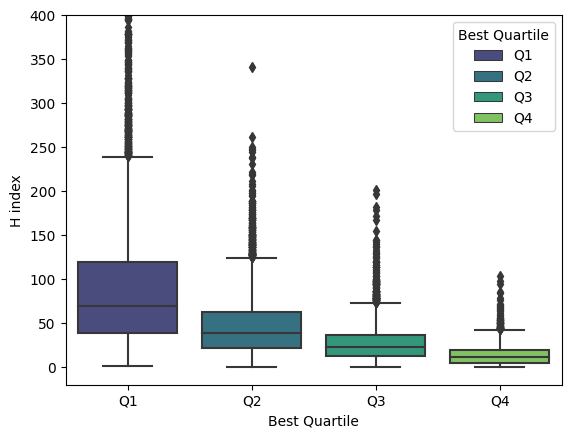

In [ ]:
p = sns.boxplot(data=unique_sjr_df, y="H index", x="Best Quartile", hue="Best Quartile", dodge=False, palette='viridis')
p.set(ylim=(-20, 400))

[(-20.0, 500.0)]

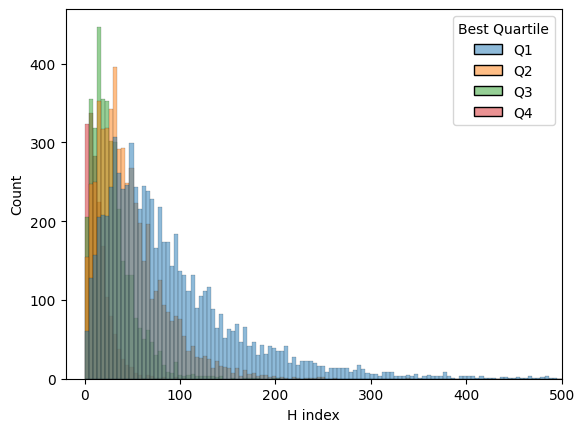

In [ ]:
p = sns.histplot(data=unique_sjr_df, x="H index", hue="Best Quartile", alpha=0.5)
p.set(xlim=(-20, 500))

#### Line plots with Quartile

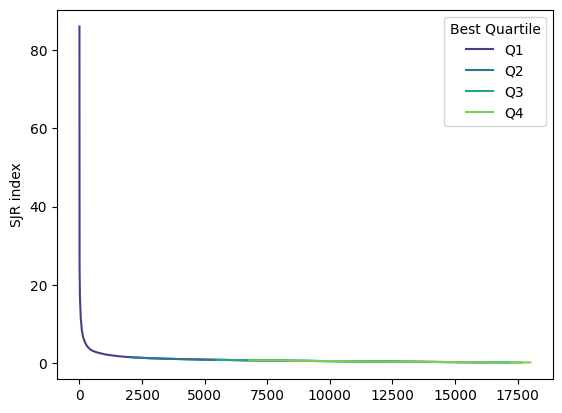

In [ ]:
p = sns.lineplot(x=unique_sjr_df.index, y=unique_sjr_df['SJR index'], hue=unique_sjr_df["Best Quartile"], palette='viridis')

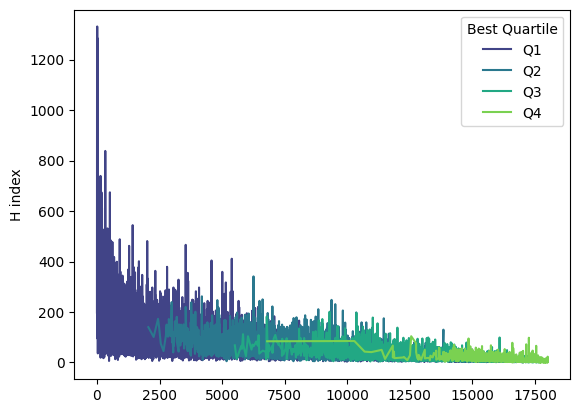

In [ ]:
p = sns.lineplot(x=unique_sjr_df.index, y=unique_sjr_df['H index'], hue=unique_sjr_df["Best Quartile"], palette='viridis')

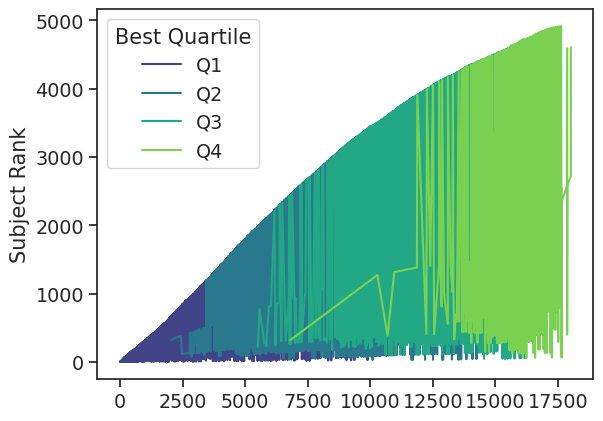

In [ ]:
p = sns.lineplot(x=unique_sjr_df.index, y=unique_sjr_df['Subject Rank'], hue=unique_sjr_df["Best Quartile"], palette='viridis')

[(-1.0, 60.0)]

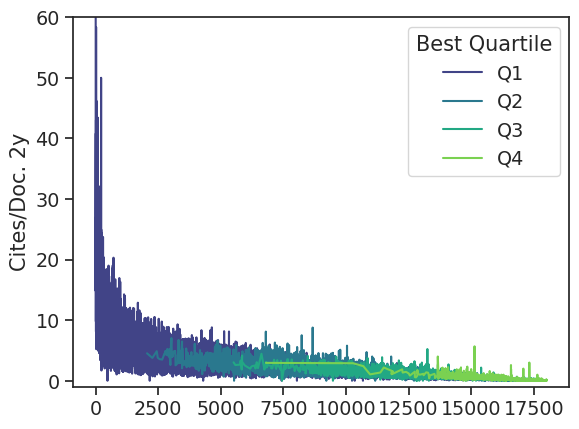

In [ ]:
p = sns.lineplot(x=unique_sjr_df.index, y=unique_sjr_df['Cites/Doc. 2y'], hue=unique_sjr_df["Best Quartile"], palette='viridis')
p.set(ylim=(-1,60))

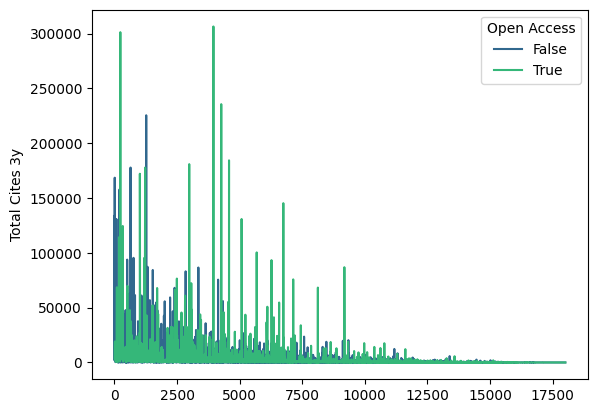

In [ ]:
p = sns.lineplot(x=unique_sjr_df.index, y=unique_sjr_df['Total Cites 3y'], hue=unique_sjr_df["Open Access"], palette='viridis')

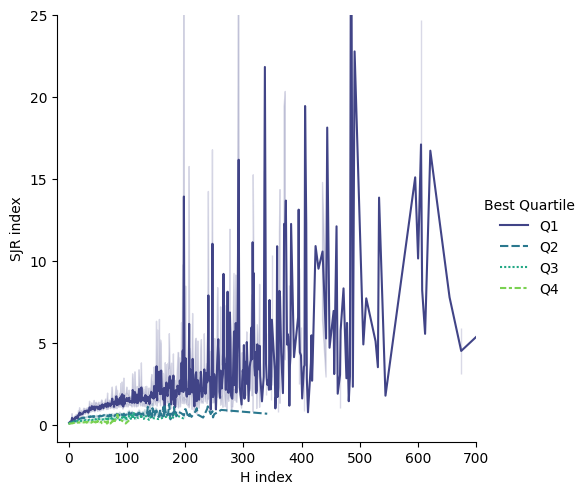

In [ ]:
### Runtime is long, Comment this cell if not needed ###

p = sns.relplot(
    data=unique_sjr_df, kind="line",
    y="SJR index", x="H index",
    hue="Best Quartile", style="Best Quartile",
    facet_kws=dict(sharex=False), palette='viridis'
)
p.set(xlim=(-20, 700))
p.set(ylim=(-1, 25))

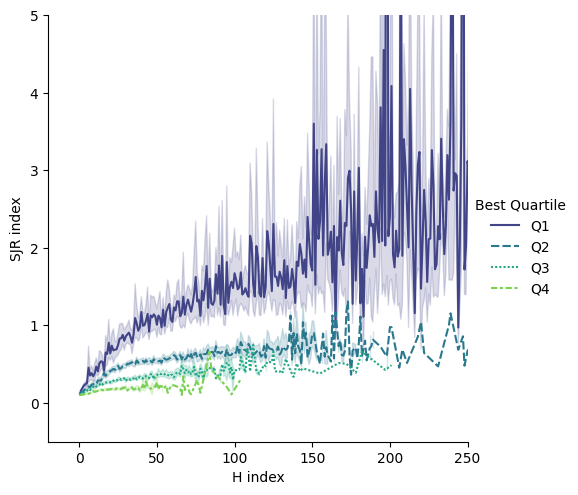

In [ ]:
### Runtime is long, Comment this cell if not needed ###

p = sns.relplot(
    data=unique_sjr_df, kind="line",
    y="SJR index", x="H index",
    hue="Best Quartile", style="Best Quartile",
    facet_kws=dict(sharex=False), palette='viridis'
)
p.set(xlim=(-20, 250))
p.set(ylim=(-0.5, 5))

#### Cat plots based on Subject Areas

<Axes: xlabel='Subject Area', ylabel='H index'>

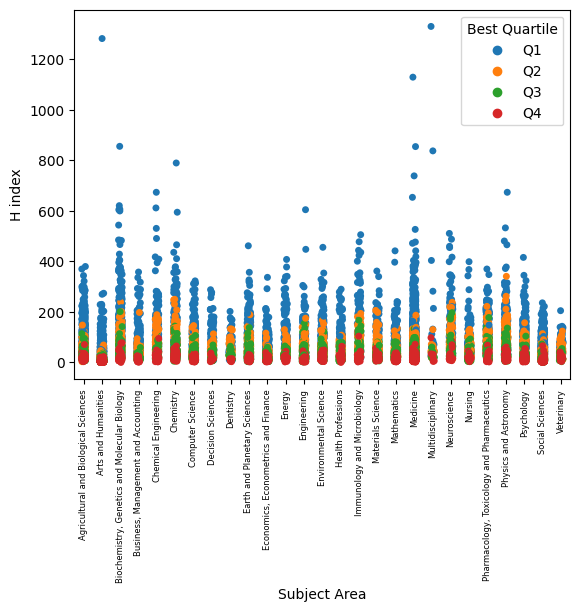

In [ ]:
plt.xticks(size=6, rotation=90)
sns.stripplot(data=unique_sjr_df, y="H index", x="Subject Area", hue="Best Quartile")


[(-1.0, 60.0)]

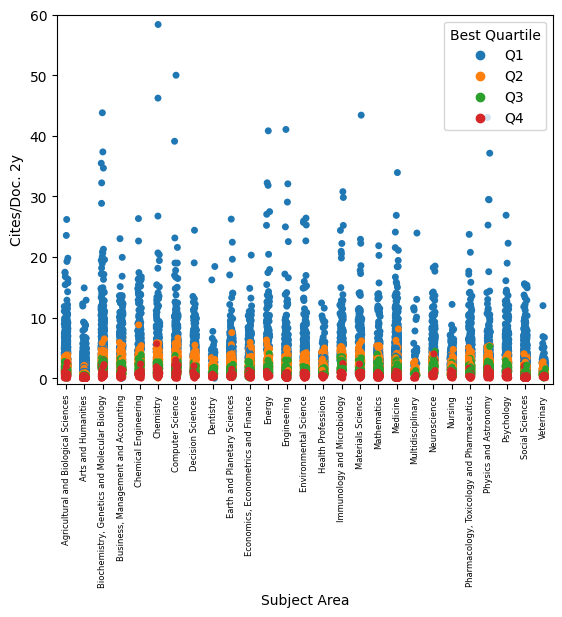

In [ ]:
plt.xticks(size=6, rotation=90)
p = sns.stripplot(data=unique_sjr_df, y="Cites/Doc. 2y", x="Subject Area", hue="Best Quartile")
p.set(ylim=(-1, 60))

#### Correlation

Shows the correlation among all the columns and their distribution, color is based on Quartile.

Runtime is VERY long!

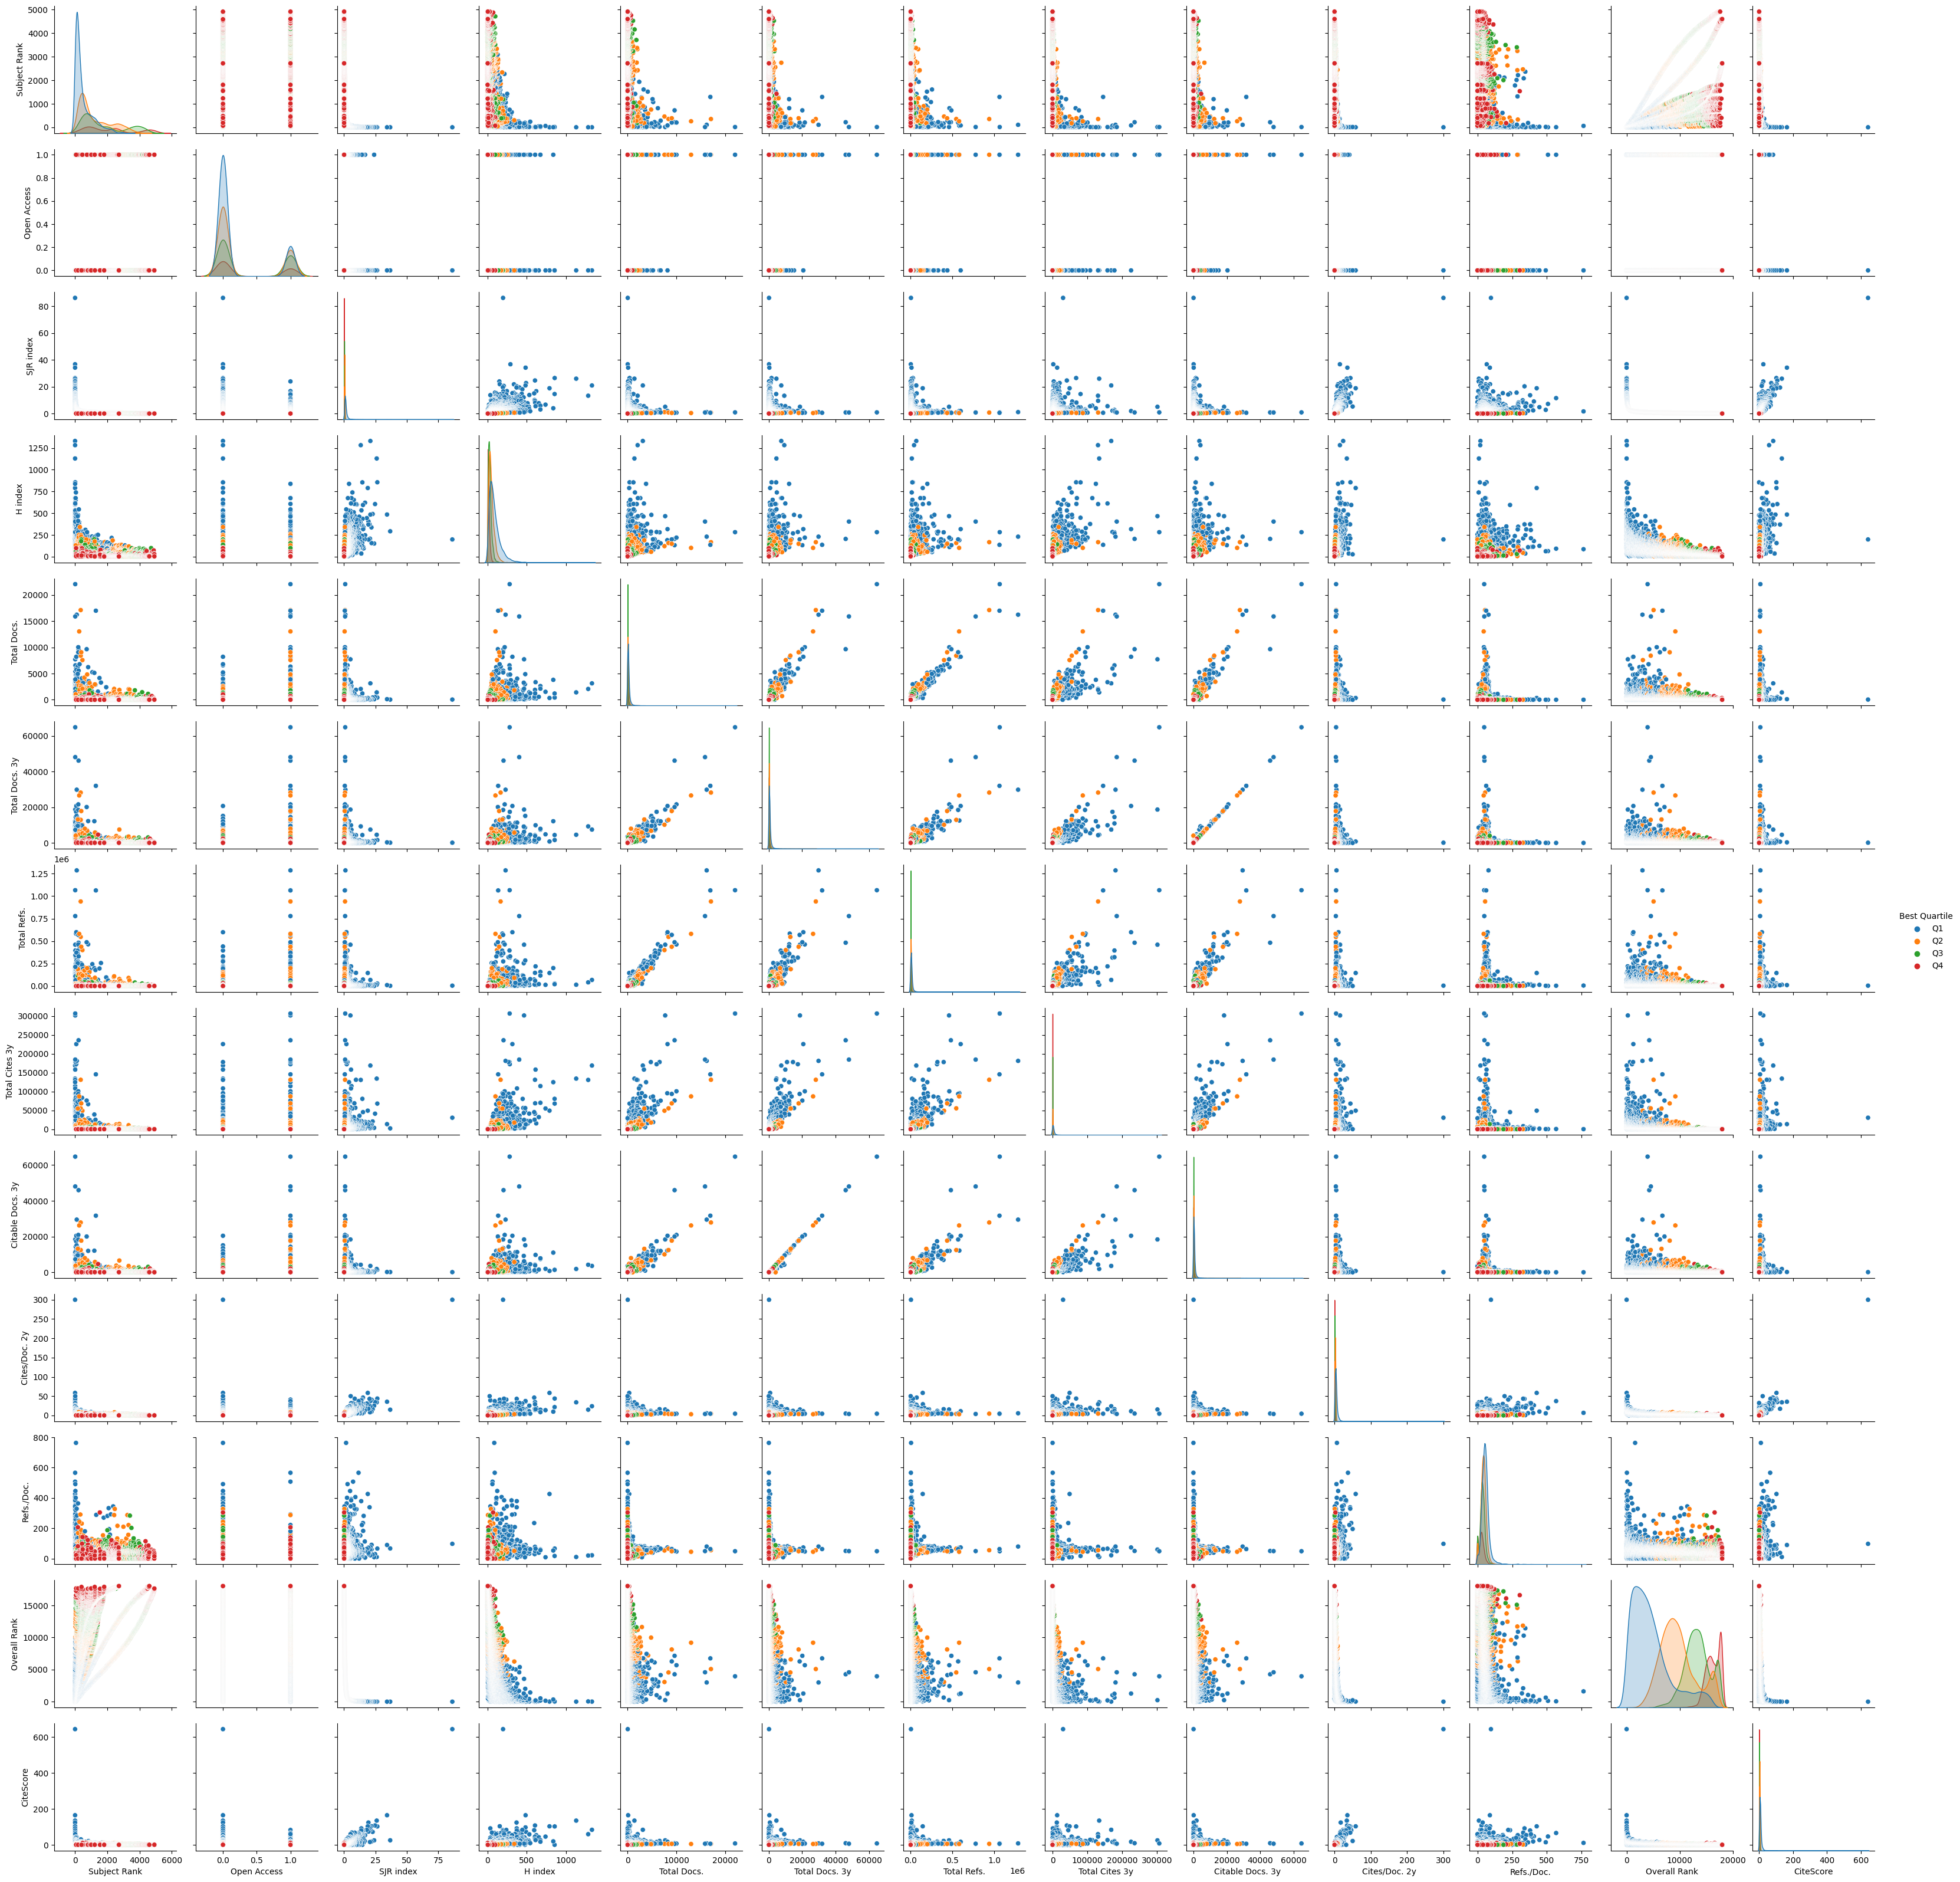

In [ ]:
### Runtime is very long, Comment this cell if not needed ###

sns.pairplot(data=unique_sjr_df, hue="Best Quartile")

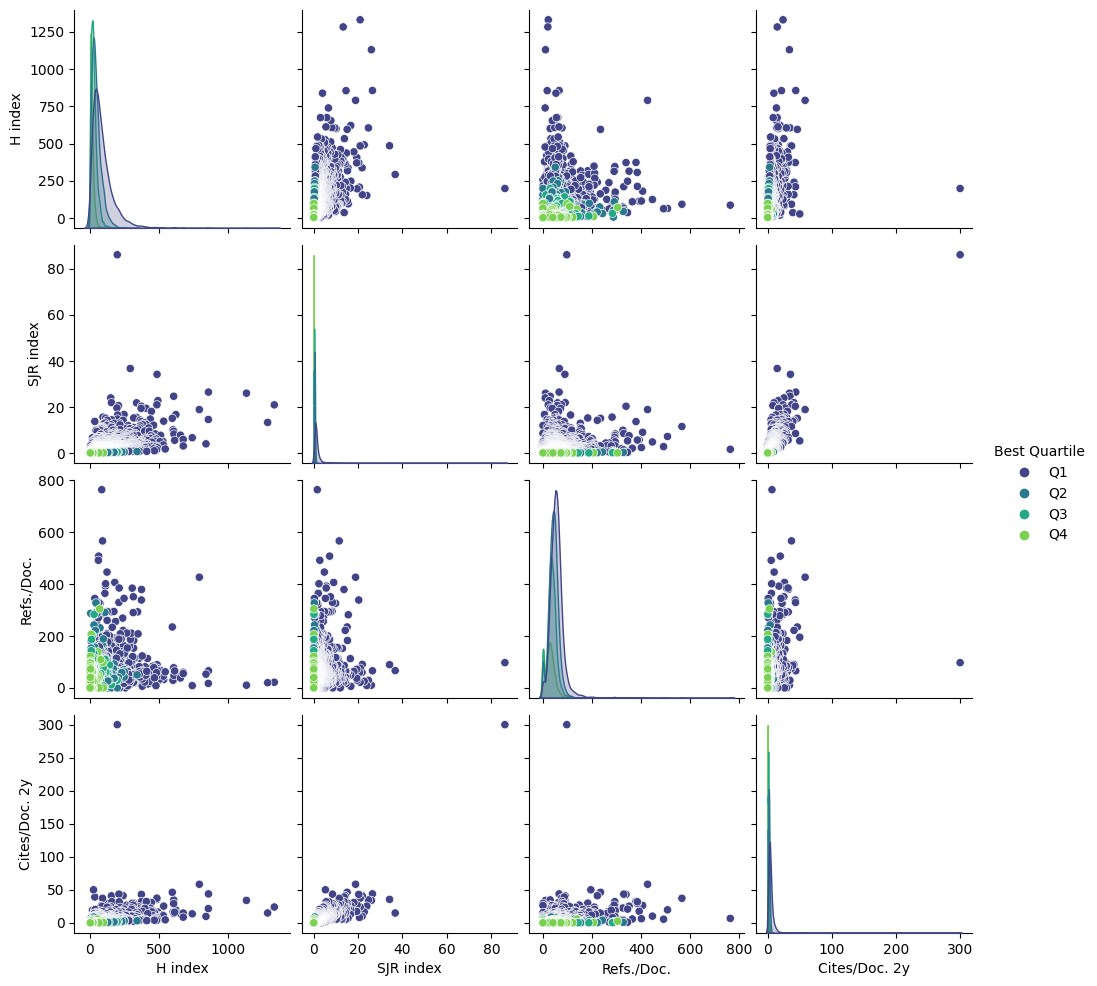

In [ ]:
sns.pairplot(unique_sjr_df[['H index', 'Best Quartile', 'SJR index', 'Refs./Doc.', 'Cites/Doc. 2y']], hue="Best Quartile", palette='viridis')

### Scatter plots

[(-1.0, 40.0)]

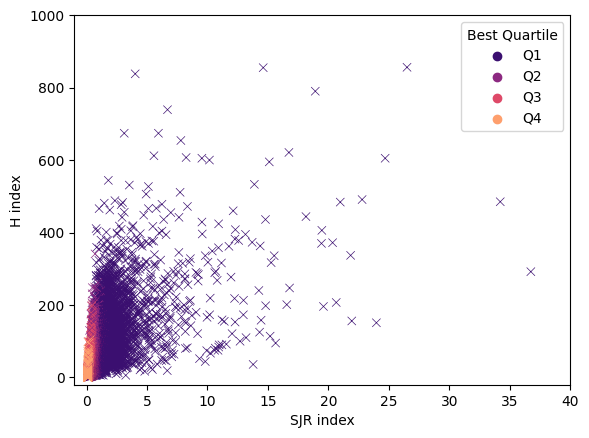

In [ ]:
p = sns.scatterplot(data=unique_sjr_df, x="SJR index", y="H index", hue="Best Quartile", marker='x', palette='magma')
p.set(ylim=(-20, 1000))
p.set(xlim=(-1, 40))

[(-50.0, 1000.0)]

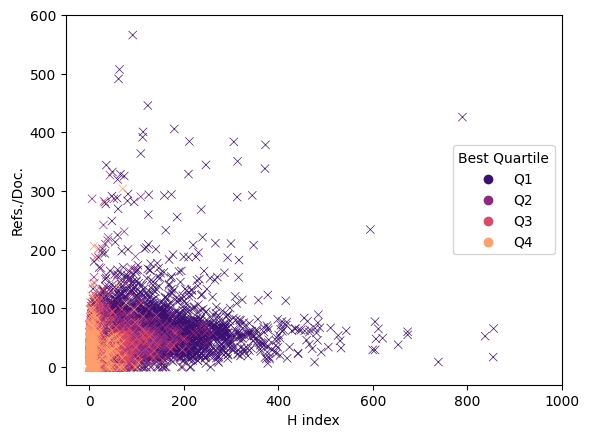

In [ ]:
p = sns.scatterplot(data=unique_sjr_df, y="Refs./Doc.", x="H index", hue="Best Quartile", marker='x', palette='magma')
p.set(ylim=(-30, 600))
p.set(xlim=(-50, 1000))

[(-2.0, 40.0)]

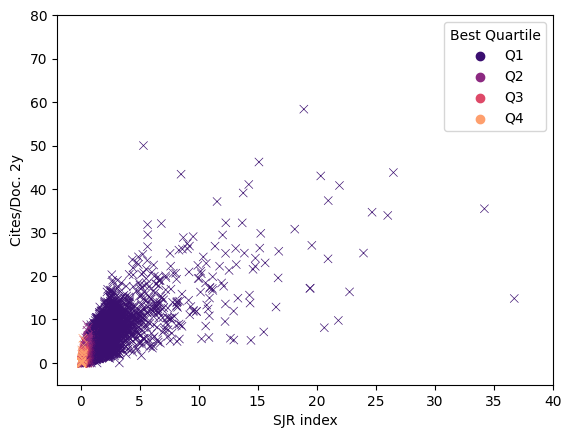

In [ ]:
p = sns.scatterplot(data=unique_sjr_df, y="Cites/Doc. 2y", x="SJR index", hue="Best Quartile", marker='x', palette='magma')
p.set(ylim=(-5, 80))
p.set(xlim=(-2, 40))

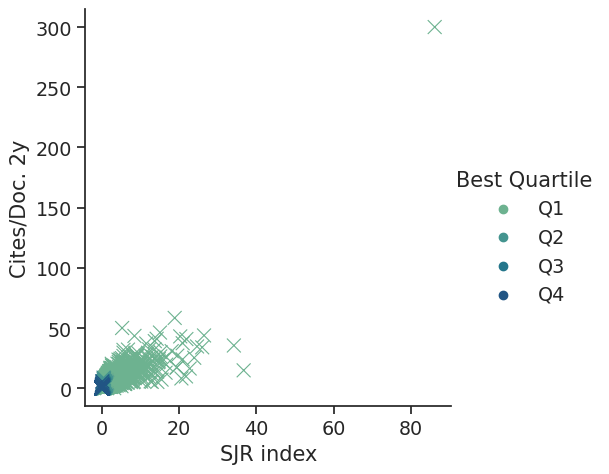

In [ ]:
sns.set_theme(style="ticks", font_scale=1.25)
p = sns.relplot(
    data=unique_sjr_df,
    x="SJR index", y="Cites/Doc. 2y", hue="Best Quartile",
    palette="crest", marker="x", s=100,
)